In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('postings.csv')


In [ ]:
print(df_clean['company_name'].value_counts().head(10))


company_name
Liberty Healthcare and Rehabilitation Services    1108
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
Ingersoll Rand                                     517
Capital One                                        496
Cogent Communications                              476
Insight Global                                     418
Dice                                               415
Name: count, dtype: int64


In [ ]:
#  salary analysis
df_salary_clean = df_clean.dropna(subset=['max_salary'])
print(df_clean["max_salary"].nunique())

5304


In [ ]:
print(grouped.head())
grouped.reset_index().head(10)


                                num_postings  max_salary  description
company_name                                                         
CalPrivate Bank                            1    110000.0            1
EGN Consult & Recruit                      1        32.0            1
Georgia Pacific                            4         NaN            4
Krems, Jackowitz & Carman, LLP             1     60000.0            1
Optima Global Solutions Inc.               2         NaN            2


,company_name,num_postings,max_salary,description
0,CalPrivate Bank,1,110000.0,1
1,EGN Consult & Recruit,1,32.0,1
2,Georgia Pacific,4,NaN,4
3,"Krems, Jackowitz & Carman, LLP",1,60000.0,1
4,Optima Global Solutions Inc.,2,NaN,2
5,Pilot Company,1,NaN,1
6,#twiceasnice Recruiting,39,83200.0,39
7,(ISSA) International Sports Sciences Association,1,NaN,1
8,(USTA) United States Tennis Association,2,NaN,2
9,.efficiently,1,NaN,1


In [ ]:
df_clean_company_name = df_clean.dropna(subset=["company_name"])
df_clean_description = df_clean.dropna(subset=["description"])
df_clean_job_id = df_clean.dropna(subset=["job_id"])

In [ ]:
df_clean_max_salary = df_clean.dropna(subset=['max_salary'])


In [ ]:
grouped = df_clean_max_salary.groupby('company_name').agg({
    'job_id': 'count',
    'max_salary': 'median',
    'description': 'count'
}).rename(columns={'job_id': 'num_postings'})


In [ ]:
print(grouped.head())
grouped.reset_index().head(10)


                                 num_postings  max_salary  description
company_name                                                          
 CalPrivate Bank                            1    110000.0            1
 EGN Consult & Recruit                      1        32.0            1
 Krems, Jackowitz & Carman, LLP             1     60000.0            1
#twiceasnice Recruiting                    35     83200.0           35
1 Search Group LLC                          1    100000.0            1


,company_name,num_postings,max_salary,description
0,CalPrivate Bank,1,110000.0,1
1,EGN Consult & Recruit,1,32.0,1
2,"Krems, Jackowitz & Carman, LLP",1,60000.0,1
3,#twiceasnice Recruiting,35,83200.0,35
4,1 Search Group LLC,1,100000.0,1
5,10 Fitness,3,34.0,3
6,10-S Tennis Supply,1,50000.0,1
7,101 Studios,1,20.0,1
8,1080 Learning Center,1,20.0,1
9,10x Genomics,1,153000.0,1


In [ ]:
grouped_sorted = grouped.sort_values('num_postings', ascending=False)
print(grouped_sorted.head(10))
print(grouped.shape)  # (number of companies, number of columns)
grouped.describe()


                                   num_postings  max_salary  description
company_name                                                            
Insight Global                              304       85.00          304
The Job Network                             274       63.11          274
Jobot                                       199   120000.00          199
Robert Half                                 168    75000.00          168
Creative Financial Staffing (CFS)           152    80000.00          152
Vaco                                        132    80000.00          132
Amazon                                      124   205600.00          124
LHH                                         109    94000.00          109
Randstad USA                                100    52000.00          100
gpac                                         94    95000.00           94
(9202, 3)


,num_postings,max_salary,description
count,9202.000000,9.202000e+03,9202.000000
mean,3.188220,1.037929e+05,3.188111
std,8.634671,1.252667e+06,8.634705
min,1.000000,2.000000e+00,0.000000
25%,1.000000,2.527500e+02,1.000000
50%,1.000000,8.500000e+04,1.000000
75%,2.000000,1.300000e+05,2.000000
max,304.000000,1.200000e+08,304.000000


In [ ]:
print("Before:", len(df_clean_max_salary))
print("After:", len(df_clean_max_salary))
print("Before:",len(df_clean_company_name))
print("After:",len(df_clean_company_name))
print("Before:",len(df_clean_job_id))
print("After:",len(df_clean_job_id))
print("Before:",len(df_clean_description))
print("After:",len(df_clean_description))

Before: 29338
After: 29338
Before: 122130
After: 122130
Before: 122130
After: 122130
Before: 122124
After: 122124


In [ ]:
#for counting jobs each company wrt job id
grouped = df_clean.groupby('company_name').agg({
    'job_id': 'count'
}).rename(columns={'job_id': 'num_postings'})


<ipython-input-25-2f4944f2eb39>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='num_job_postings', y='company_name', palette='mako')


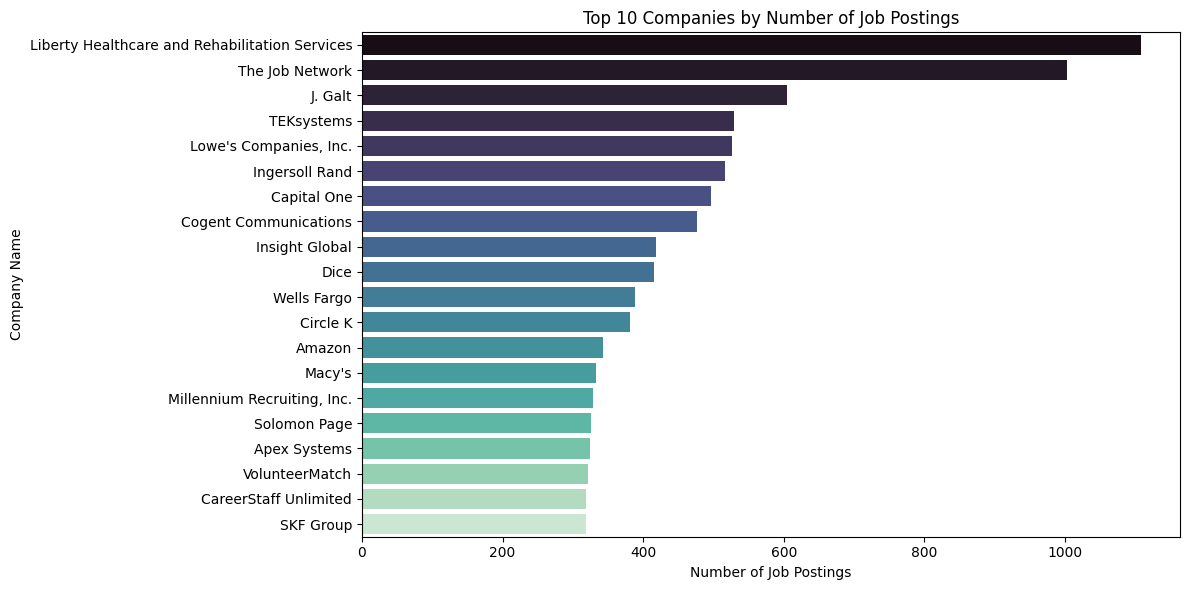

In [ ]:
df_clean = df.dropna(subset=["company_name","job_id"])
top_companies = (
    df_clean.groupby('company_name')['job_id']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

top_companies.columns = ['company_name', 'num_job_postings']
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='num_job_postings', y='company_name', palette='mako')
plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

In [ ]:
num_companies = df_clean['company_name'].nunique()
print("Number of unique companies:", num_companies)


Number of unique companies: 24428


In [ ]:
num_job_ids = df_clean["job_id"].nunique()
print("Number of unique job ids:",num_job_ids)

Number of unique job ids: 122130


In [ ]:


# Drop rows where company_name or job_id are missing
df = df.dropna(subset=['company_name', 'job_id'])

# Also clean skills, listed_time, formatted_work_type when necessary
df = df.dropna(subset=["skills_desc", "listed_time", "work_type"])

In [ ]:
top_companies = df['company_name'].value_counts().nlargest(50).reset_index()
top_companies.columns = ['company_name', 'job_count']
top_company_names = top_companies['company_name'].tolist()


In [ ]:
# Filter only Top 50 companies
df_top_skills = df[df['company_name'].isin(top_company_names)].copy()

# Drop missing skills
df_top_skills = df_top_skills.dropna(subset=['skills_desc'])

# Split skills into lists
df_top_skills['skills_list'] = df_top_skills['skills_desc'].str.split(',')

# Explode the list into rows
df_exploded = df_top_skills.explode('skills_list')

# Clean skills names
df_exploded['skills_list'] = df_exploded['skills_list'].str.strip()

# Create Pivot Table
skills_pivot = df_exploded.pivot_table(
    index='skills_list',
    columns='company_name',
    aggfunc='size',
    fill_value=0
)


In [ ]:
df['listed_time'] = pd.to_datetime(df['listed_time'], errors='coerce')

# Drop if listed_time is invalid
df = df.dropna(subset=['listed_time'])

# Group by Month
df['month_year'] = df['listed_time'].dt.to_period('M')
monthly_postings = df.groupby('month_year').size().reset_index(name='job_count')


In [ ]:
work_type_counts = df['formatted_work_type'].value_counts().reset_index()
work_type_counts.columns = ['work_type', 'count']


In [ ]:

df_cleaned = df.dropna(subset=['company_name', 'job_id'])

df_cleaned['skills_desc'] = df_cleaned['skills_desc'].fillna('No skills listed')


In [ ]:
df_cleaned = df_cleaned.drop_duplicates()


In [ ]:
# Fill missing skills_desc with a placeholder
df_cleaned['skills_desc'] = df_cleaned['skills_desc'].fillna('No skills listed')

# Fill missing work_type
df_cleaned['work_type'] = df_cleaned['work_type'].fillna('Not specified')

# Fill missing listed_time with Not listed
df_cleaned['listed_time'] = df_cleaned['listed_time'].fillna('Not listed')


In [ ]:
# Convert listed_time and closed_time to datetime format
df_cleaned['listed_time'] = pd.to_datetime(df_cleaned['listed_time'], errors='coerce')
df_cleaned['listed_time'] = df_cleaned['listed_time'].fillna(pd.to_datetime('today'))


In [ ]:
df_cleaned = df_cleaned.drop_duplicates()


In [ ]:
# Filter out rows where job_count is too low
df_cleaned = df_cleaned[df_cleaned['job_id'] > 1]



In [ ]:

df_cleaned['work_type'] = df_cleaned['work_type'].str.lower()
df_cleaned['skills_desc'] = df_cleaned['skills_desc'].str.strip().str.lower()


In [ ]:

df_cleaned.to_csv('job_postings.csv', index=False)


In [ ]:
# Checking if any missing values remain in the dataset
print(df_cleaned.isnull().sum())


job_id                           0
Company                          0
title                            0
description                      0
max_salary                    2235
pay_period                    2101
location                         0
company_id                       0
views                           71
med_salary                    2302
min_salary                    2235
formatted_work_type              0
applies                       2189
original_listed_time             0
remote_allowed                2360
job_posting_url                  0
application_url                 21
application_type                 0
expiry                           0
closed_time                   2400
formatted_experience_level      77
skills_desc                      0
listed_time                      0
posting_domain                   7
sponsored                        0
work_type                        0
currency                      2101
compensation_type             2101
normalized_salary   

In [ ]:
# Check the data types of each column
print(df_cleaned.dtypes)


job_id                                 int64
Company                               object
title                                 object
description                           object
max_salary                           float64
pay_period                            object
location                              object
company_id                           float64
views                                float64
med_salary                           float64
min_salary                           float64
formatted_work_type                   object
applies                              float64
original_listed_time                 float64
remote_allowed                       float64
job_posting_url                       object
application_url                       object
application_type                      object
expiry                               float64
closed_time                          float64
formatted_experience_level            object
skills_desc                           object
listed_tim

In [ ]:
# Check for duplicate rows
print(df_cleaned.duplicated().sum())


0


In [ ]:
duplicate_rows = df_cleaned_reloaded.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of Duplicate Rows: {duplicate_rows}")


Number of Duplicate Rows: 0


In [ ]:
data_types = df_cleaned_reloaded.dtypes

print("Data Types of Each Column:")
print(data_types)


Data Types of Each Column:
job_id                          int64
Company                        object
title                          object
description                    object
max_salary                    float64
pay_period                     object
location                       object
company_id                    float64
views                         float64
med_salary                    float64
min_salary                    float64
formatted_work_type            object
applies                       float64
original_listed_time          float64
remote_allowed                float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                    object
posting_domain                 object
sponsored                       int64
work_type              

In [ ]:
# Check the unique values of a specific column
print("Unique values in 'skills_desc' column:")
print(df_cleaned_reloaded['skills_desc'].unique())
print("Unique values in 'work_type' column:")
print(df_cleaned_reloaded['work_type'].unique())


Unique values in 'skills_desc' column:
['requirements: \n\nwe are seeking a college or graduate student (can also be completed with school) with a focus in planning, architecture, real estate development or management or general business. must be able to work in an extremely fast paced environment and able to multitask and prioritize.'
 'we are currently accepting resumes for foh - asisstant restaurant management with a strong focus on delivering high quality customer service. prefer 1 to 3 years foh management experience. candidate should be a self-starter, proactive, attentive to details and like developing others. must have a strong sense of teamwork and strong witten and verbal communication skills. have a keen interest in service, food and learning. passion for excellence and doing things right.'
 'this position requires a baseline understanding of online marketing including search engine marketing, search engine optimization, and campaign analytics. the ideal candidate must be an